In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Notes:
# globaal idee van wat voor soort experimenten we doen
# ?Beschrijven van algemeenheden van experimenten
# Fine-tuning base10 - different configs & hours - WER
# -Different values for lm-weight blabla
# Fine-tuning xlsr - difference with base10 - WER
# Shifting subtitles - difference without shifting - xlsr + base10 - WER
# Other stuff
# -Use of interpunction
# -Eh cases
# -Summarizing information
# -Equal LM model for asr + my model

In [4]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

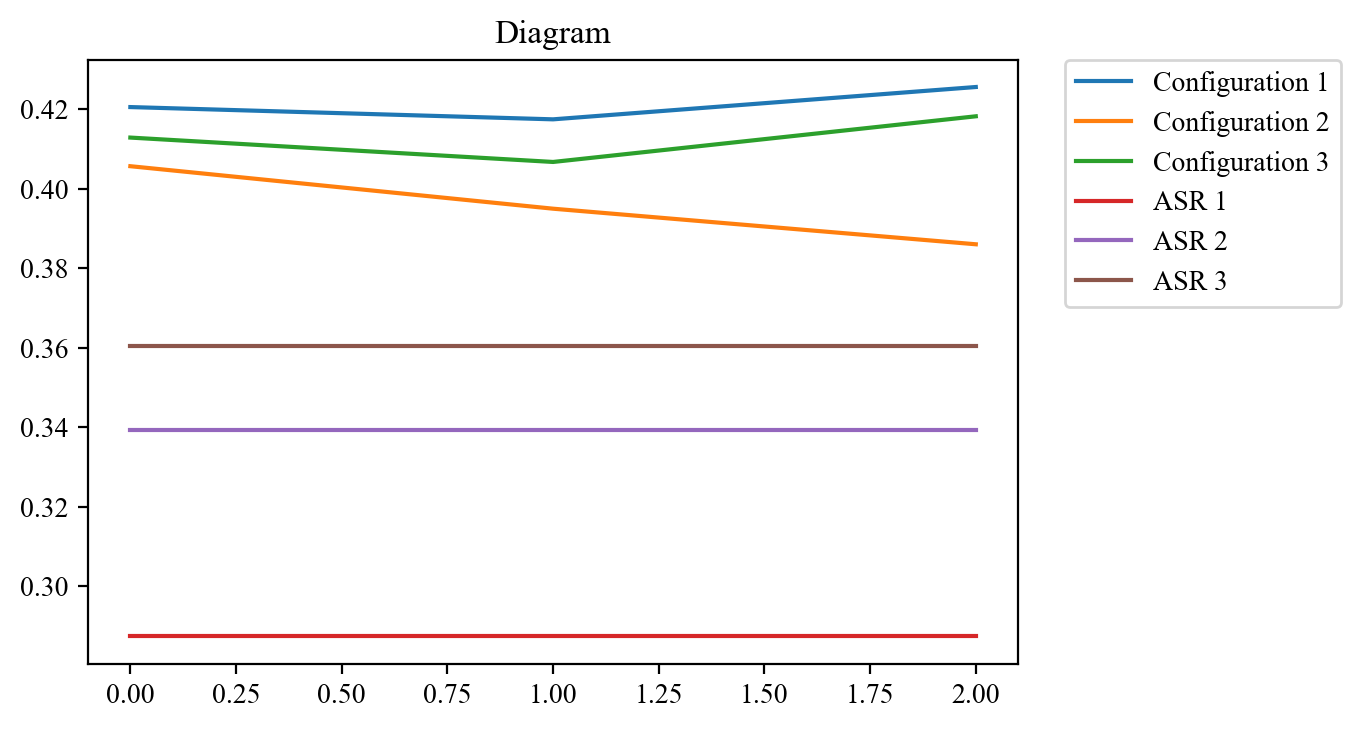

In [5]:
# Fine-tuning base10 - different configs & hours - WER

# config1: [2021-11-11/18-12-54, 2021-11-12/10-12-27, 2021-11-12/10-34-58]
# config2: [2021-11-14/15-14-42, 2021-11-14/15-23-43, 2021-11-14/15-30-40]
# config3: [2021-11-15/11-44-06, 2021-11-15/11-45-07, 2021-11-15/13-23-43]

# testset: 'test'
# normal
data = {
        'Configuration 1': [0.4205669671663695, 0.41747871716981055, 0.42561384172120553], #0:50:32.936000
        'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728], #1:06:01.672000
        'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135], #1:00:00.798000
        'ASR 1': [0.2874460738421658, 0.2874460738421658, 0.2874460738421658],
        'ASR 2': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 3': [0.36049485629530365, 0.36049485629530365, 0.36049485629530365]
       }

# testset: 'test'
# weird: model config1 tested on config2 testset
data2 = {
        'Configuration 1': [0.48873507856770765, 0.47082425935335026, 0.4809520257377578],
        'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728],
        'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135],
        'ASR 1': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 2': [0.33927041341867675, 0.33927041341867675, 0.33927041341867675],
        'ASR 3': [0.36049485629530365, 0.36049485629530365, 0.36049485629530365]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Diagram')
plt.show()

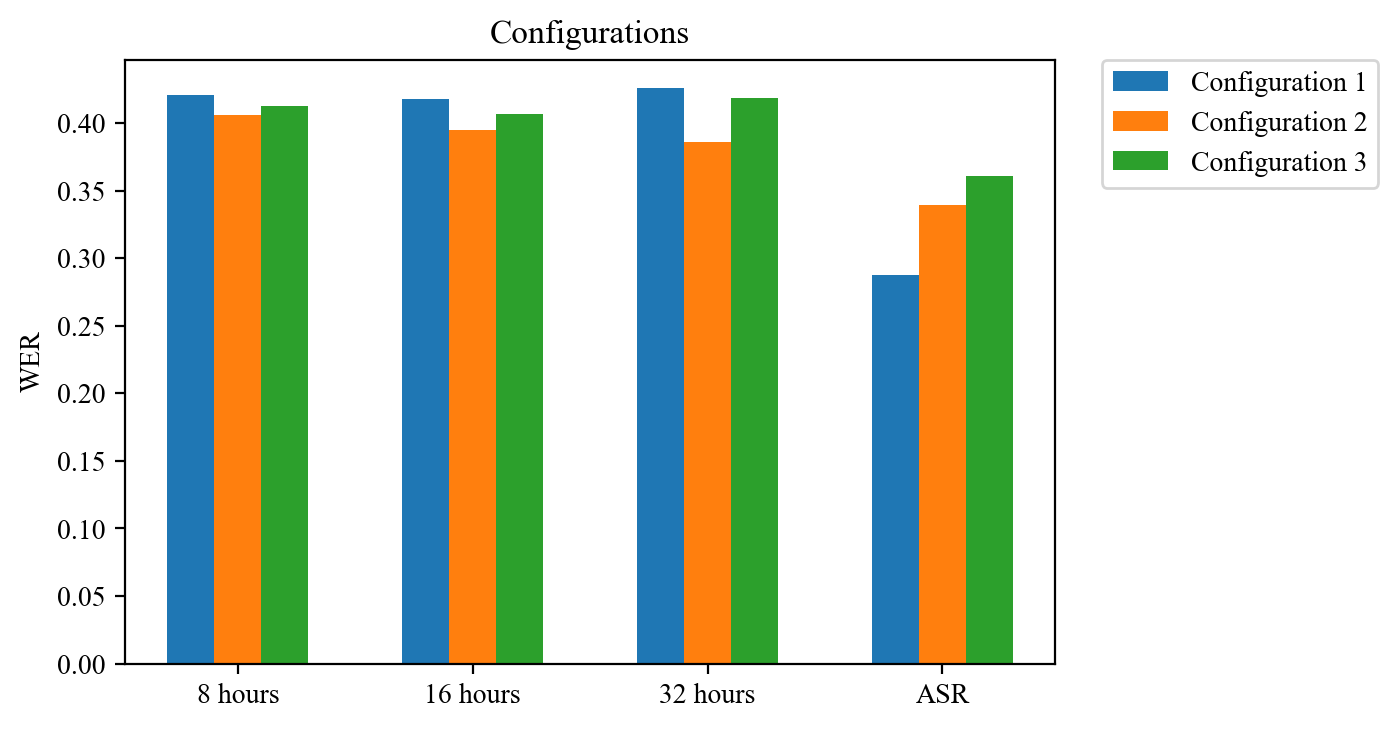

In [6]:
data = {
        'Configuration 1': [0.4205669671663695, 0.41747871716981055, 0.42561384172120553, 0.2874460738421658], #0:50:32.936000
        'Configuration 2': [0.4056876739594236, 0.3949950689869304, 0.3860400177398728, 0.33927041341867675], #1:06:01.672000
        'Configuration 3': [0.4128892392107573, 0.4067541928500564, 0.41824517531907135, 0.36049485629530365] #1:00:00.798000
       }
labels = ['8 hours', '16 hours', '32 hours', 'ASR']
colors = ['r', 'g', 'b']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)

ax.set_ylabel('WER')
ax.set_title('Configurations')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

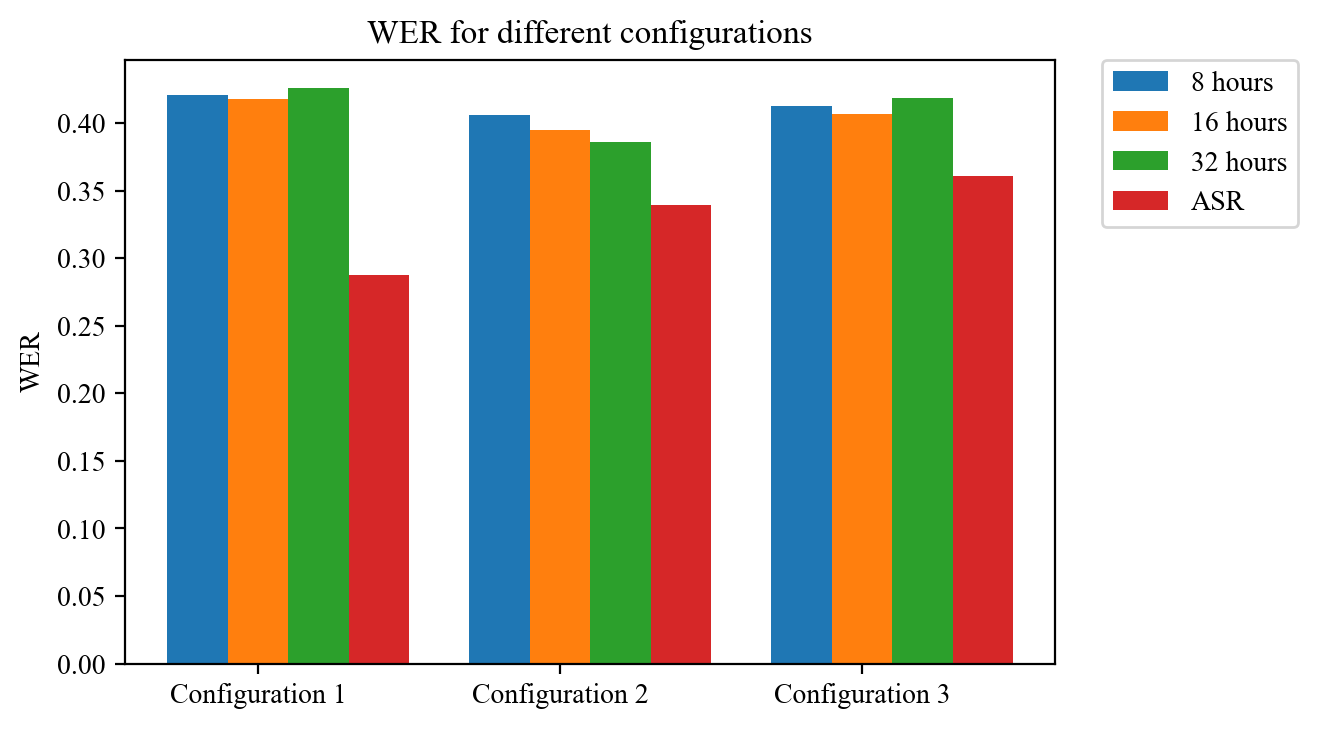

In [7]:
data = {
        '8 hours': [0.4205669671663695, 0.4056876739594236, 0.4128892392107573],
        '16 hours': [0.41747871716981055, 0.3949950689869304, 0.4067541928500564],
        '32 hours': [0.42561384172120553, 0.3860400177398728, 0.41824517531907135],
        'ASR': [0.2874460738421658, 0.33927041341867675, 0.36049485629530365]
       }
labels = ['Configuration 1', 'Configuration 2', 'Configuration 3']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()

for i, key in enumerate(data):
    offsets = x - width + (i*width)
    ax.bar(offsets, data[key], width, label=key)

ax.set_ylabel('WER')
ax.set_title('WER for different configurations')
ax.set_xticks(x, labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

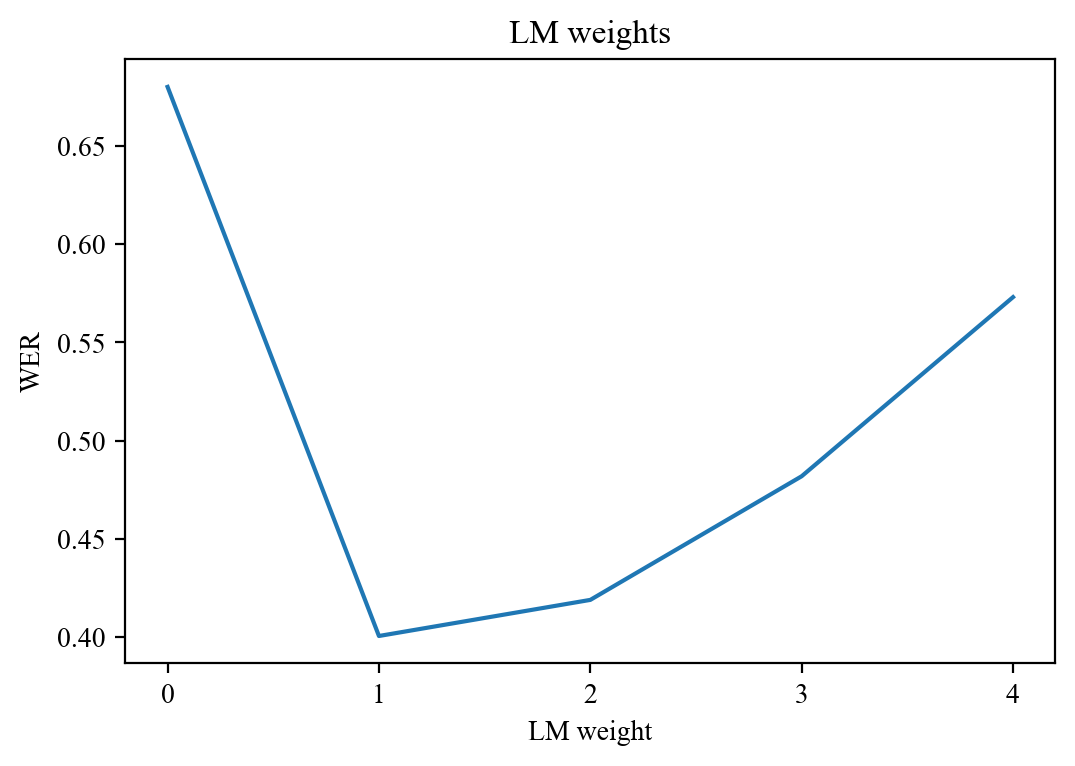

In [16]:
# Fine-tuning base10 - different LM weights - WER

# testset: 'test'
data = {
        'data': [0.6800015759850048, 0.400496537287012, 0.4188714403522149, 0.4818145555691041, 0.5729844720830859]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('LM weights')
plt.xlabel('LM weight')
plt.ylabel('WER')
plt.xticks(list(range(5)), [0, 1, 2, 3, 4])
plt.show()

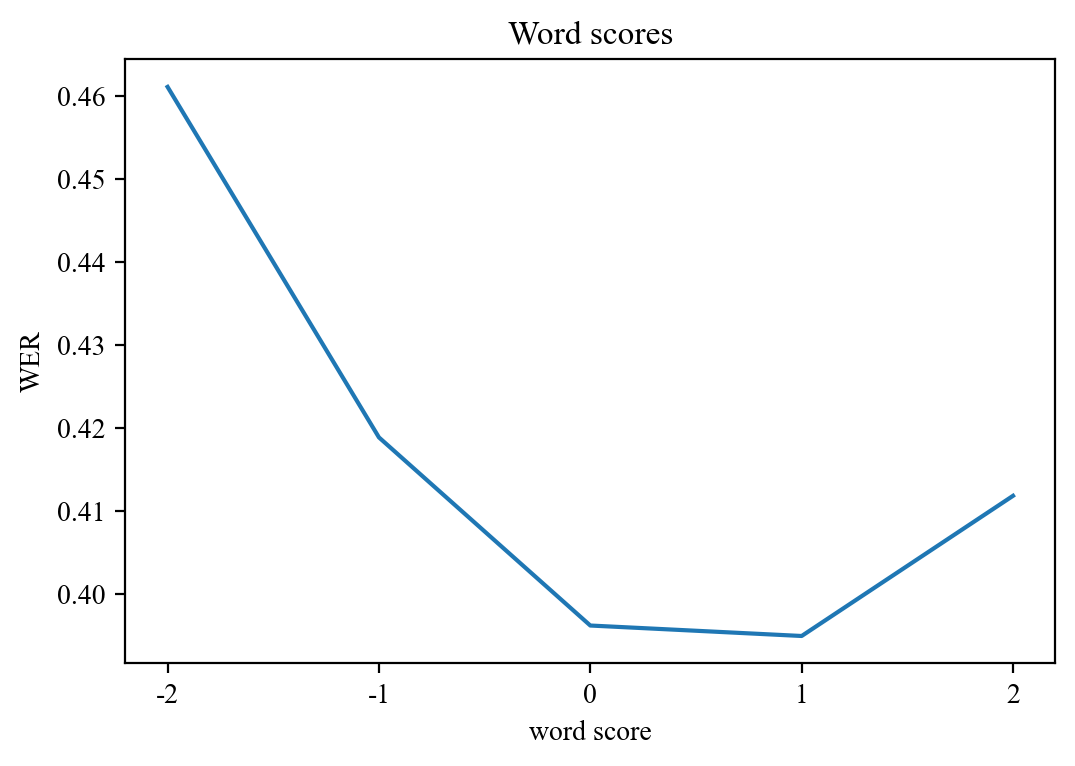

In [18]:
# Fine-tuning base10 - different word scores - WER

# testset: 'test'
data = {
        'data': [0.46112289783367766, 0.4188714403522149, 0.39619327270468824, 0.3949318684814962, 0.41183074880718246]
       }

fig, ax = plt.subplots()
for key in data:
    ax.plot(data[key], label=key)
plt.title('Word scores')
plt.xlabel('word score')
plt.ylabel('WER')
plt.xticks(list(range(5)), [-2, -1, 0, 1, 2])
plt.show()